In [1]:
#import libraries
import numpy as np 
import pandas as pd 
import matplotlib.pyplot  as plt
import seaborn as sns
%matplotlib inline

In [2]:
#read the csv file and store data in variable 
data= pd.read_csv('data.csv')
#prints information about the DataFrame
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4600 entries, 0 to 4599
Data columns (total 18 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   date           4600 non-null   object 
 1   price          4600 non-null   float64
 2   bedrooms       4600 non-null   float64
 3   bathrooms      4600 non-null   float64
 4   sqft_living    4600 non-null   int64  
 5   sqft_lot       4600 non-null   int64  
 6   floors         4600 non-null   float64
 7   waterfront     4600 non-null   int64  
 8   view           4600 non-null   int64  
 9   condition      4600 non-null   int64  
 10  sqft_above     4600 non-null   int64  
 11  sqft_basement  4600 non-null   int64  
 12  yr_built       4600 non-null   int64  
 13  yr_renovated   4600 non-null   int64  
 14  street         4600 non-null   object 
 15  city           4600 non-null   object 
 16  statezip       4600 non-null   object 
 17  country        4600 non-null   object 
dtypes: float

In [3]:
data.shape

(4600, 18)

In [4]:
data.head()

,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,sqft_above,sqft_basement,yr_built,yr_renovated,street,city,statezip,country
0,2014-05-02 00:00:00,313000.0,3.0,1.50,1340,7912,1.5,0,0,3,1340,0,1955,2005,18810 Densmore Ave N,Shoreline,WA 98133,USA
1,2014-05-02 00:00:00,2384000.0,5.0,2.50,3650,9050,2.0,0,4,5,3370,280,1921,0,709 W Blaine St,Seattle,WA 98119,USA
2,2014-05-02 00:00:00,342000.0,3.0,2.00,1930,11947,1.0,0,0,4,1930,0,1966,0,26206-26214 143rd Ave SE,Kent,WA 98042,USA
3,2014-05-02 00:00:00,420000.0,3.0,2.25,2000,8030,1.0,0,0,4,1000,1000,1963,0,857 170th Pl NE,Bellevue,WA 98008,USA
4,2014-05-02 00:00:00,550000.0,4.0,2.50,1940,10500,1.0,0,0,4,1140,800,1976,1992,9105 170th Ave NE,Redmond,WA 98052,USA


In [5]:
#value_counts() function returns object containing counts of unique values
#only one country data is present
data.country.value_counts()

USA    4600
Name: country, dtype: int64

In [6]:
#remove Column 'date','country','street', 'city' from dataframe
data.drop(['date','country','street', 'city'], axis = 1, inplace = True)
data.head()

,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,sqft_above,sqft_basement,yr_built,yr_renovated,statezip
0,313000.0,3.0,1.50,1340,7912,1.5,0,0,3,1340,0,1955,2005,WA 98133
1,2384000.0,5.0,2.50,3650,9050,2.0,0,4,5,3370,280,1921,0,WA 98119
2,342000.0,3.0,2.00,1930,11947,1.0,0,0,4,1930,0,1966,0,WA 98042
3,420000.0,3.0,2.25,2000,8030,1.0,0,0,4,1000,1000,1963,0,WA 98008
4,550000.0,4.0,2.50,1940,10500,1.0,0,0,4,1140,800,1976,1992,WA 98052


In [7]:
#check for null values in dataframe 
data.isnull().sum()

price            0
bedrooms         0
bathrooms        0
sqft_living      0
sqft_lot         0
floors           0
waterfront       0
view             0
condition        0
sqft_above       0
sqft_basement    0
yr_built         0
yr_renovated     0
statezip         0
dtype: int64

C:\Users\lenovo\AppData\Local\Temp\ipykernel_1044\3825696871.py:3: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(data.corr(),cmap = 'RdYlBu',fmt = '.2f',linewidths = 2,annot = True)


<Axes: >

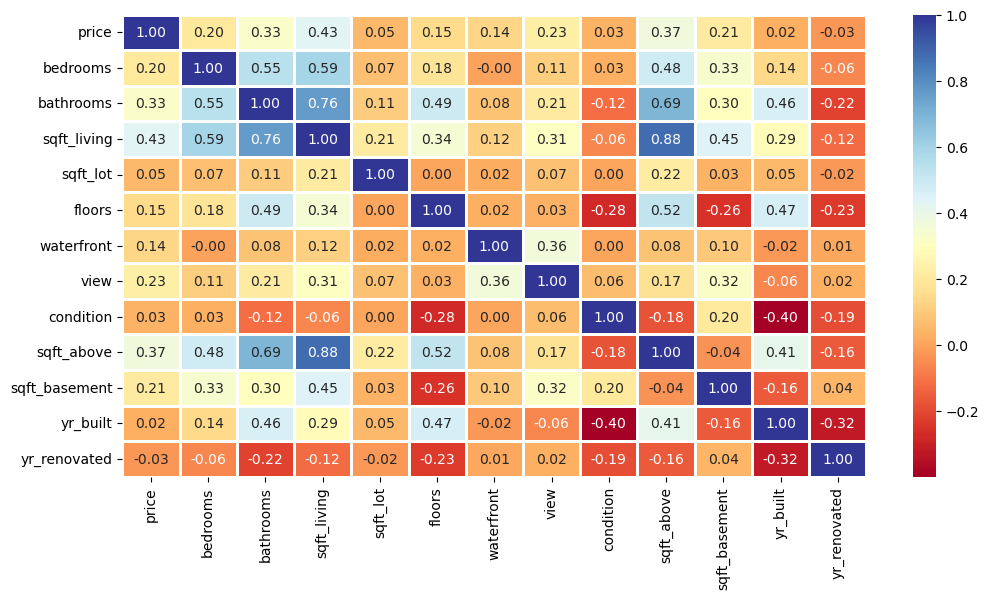

In [8]:
#plot correlation matrix 
plt.figure(figsize=(12, 6))
sns.heatmap(data.corr(),cmap = 'RdYlBu',fmt = '.2f',linewidths = 2,annot = True)

<Axes: xlabel='bedrooms', ylabel='price'>

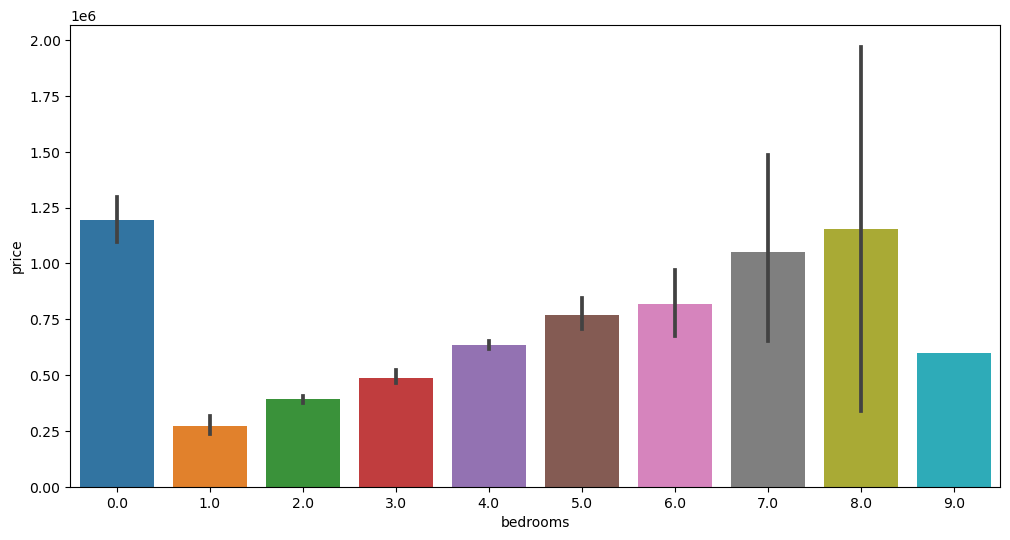

In [9]:
#plot barplot between Bedrooms and price
plt.figure(figsize=(12, 6))
sns.barplot(x = data.bedrooms, y = data.price)

<Axes: xlabel='bathrooms', ylabel='price'>

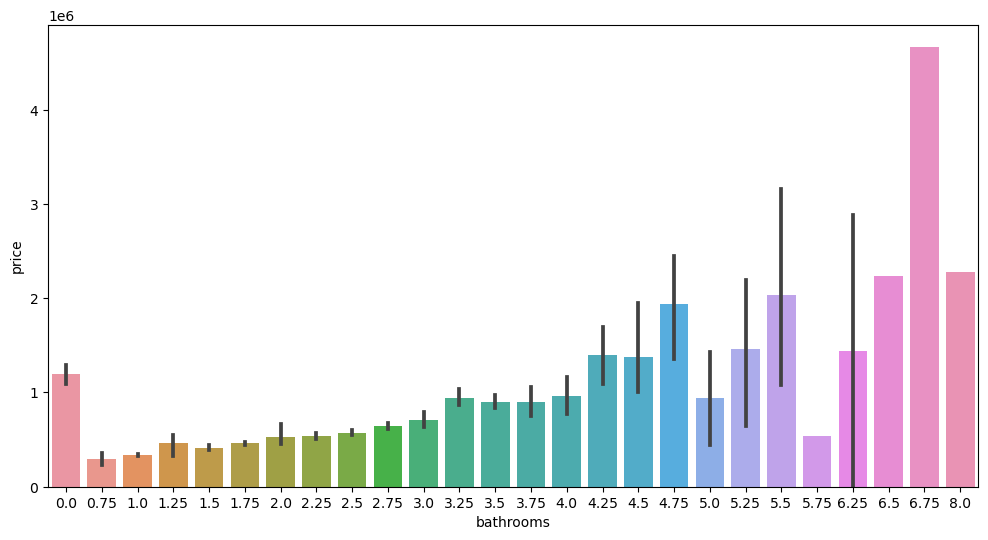

In [10]:
#plot barplot between Bathroom and price
plt.figure(figsize=(12, 6))
sns.barplot(x = data.bathrooms, y = data.price)

In [11]:
#printing number of bedrooms in  each category and and their min and max price
data.groupby('bedrooms').price.agg([len, min, max])

,len,min,max
bedrooms,,,
0.0,2,1095000.0,1295648.0
1.0,38,0.0,540000.0
2.0,566,0.0,1695000.0
3.0,2032,0.0,26590000.0
4.0,1531,0.0,4489000.0
5.0,353,0.0,7062500.0
6.0,61,0.0,3100000.0
7.0,14,280000.0,3200000.0
8.0,2,340000.0,1970000.0


In [12]:
#printing number of bathrooms in  each category and and their min and max price
data.groupby('bathrooms').price.agg([len, min, max])

,len,min,max
bathrooms,,,
0.00,2,1095000.0,1295648.0
0.75,17,80000.0,562100.0
1.00,743,0.0,2110000.0
1.25,3,321950.0,545000.0
1.50,291,0.0,2199900.0
1.75,629,0.0,2100000.0
2.00,427,0.0,26590000.0
2.25,419,0.0,2400000.0
2.50,1189,0.0,12899000.0


In [13]:
#copy the dataframe ("data ") to "df"
df = data.copy()

In [14]:
df.shape

(4600, 14)

In [15]:
#print the number of satezip code and number of house under it
df.statezip.value_counts()

WA 98103    148
WA 98052    135
WA 98117    132
WA 98115    130
WA 98006    110
           ... 
WA 98047      6
WA 98288      3
WA 98050      2
WA 98354      2
WA 98068      1
Name: statezip, Length: 77, dtype: int64

<Axes: xlabel='price', ylabel='statezip'>

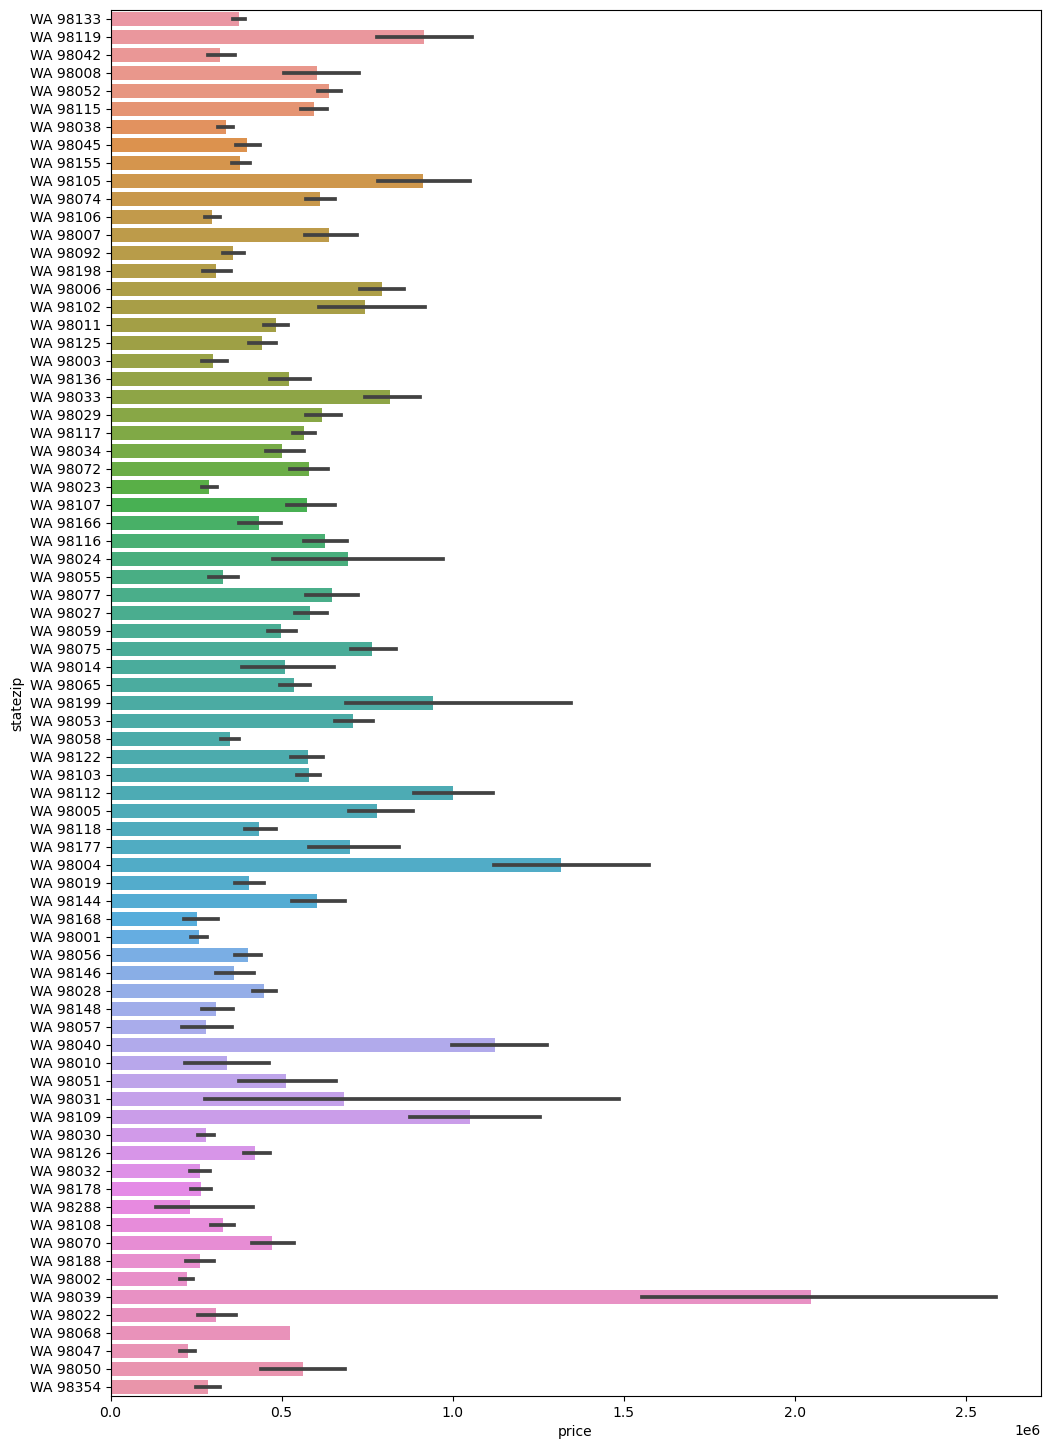

In [16]:
#plot barplot between price and statezip
plt.figure(figsize=(12, 18))
sns.barplot( x = df.price, y = df.statezip)

In [17]:
#print min and max price 
df.price.agg([min, max])

min           0.0
max    26590000.0
Name: price, dtype: float64

In [18]:
#print The number of rows in which price is 0
len(df[(df.price == 0)])

49

In [19]:
#copy price==0 rows to Zero_pricr dataframe
zero_price = df[(df.price == 0)].copy()
#print diamension of dataframe
zero_price.shape

(49, 14)

In [20]:
zero_price.head()

,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,sqft_above,sqft_basement,yr_built,yr_renovated,statezip
4354,0.0,3.0,1.75,1490,10125,1.0,0,0,4,1490,0,1962,0,WA 98001
4356,0.0,4.0,2.75,2600,5390,1.0,0,0,4,1300,1300,1960,2001,WA 98199
4357,0.0,6.0,2.75,3200,9200,1.0,0,2,4,1600,1600,1953,1983,WA 98146
4358,0.0,5.0,3.50,3480,36615,2.0,0,0,4,2490,990,1983,0,WA 98075
4361,0.0,5.0,1.50,1500,7112,1.0,0,0,5,760,740,1920,0,WA 98166


In [21]:
zero_price.agg([min, max, 'mean', 'median'])

C:\Users\lenovo\AppData\Local\Temp\ipykernel_1044\3246869973.py:1: FutureWarning: ['statezip'] did not aggregate successfully. If any error is raised this will raise in a future version of pandas. Drop these columns/ops to avoid this warning.
  zero_price.agg([min, max, 'mean', 'median'])


,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,sqft_above,sqft_basement,yr_built,yr_renovated,statezip
min,0.0,1.000000,1.00000,720.000000,3500.000000,1.0,0.000000,0.000000,2.000000,720.000000,0.000000,1920.000000,0.000000,WA 98001
max,0.0,6.000000,6.25000,8020.000000,188200.000000,3.0,1.000000,4.000000,5.000000,8020.000000,1950.000000,2013.000000,2009.000000,WA 98199
mean,0.0,3.979592,2.69898,2787.142857,16453.306122,1.5,0.061224,0.795918,3.673469,2295.714286,491.428571,1969.918367,812.714286,NaN
median,0.0,4.000000,2.50000,2600.000000,9000.000000,1.5,0.000000,0.000000,3.000000,1990.000000,0.000000,1962.000000,0.000000,NaN


In [22]:
#reset indexes
df = df.reset_index()
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4600 entries, 0 to 4599
Data columns (total 15 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   index          4600 non-null   int64  
 1   price          4600 non-null   float64
 2   bedrooms       4600 non-null   float64
 3   bathrooms      4600 non-null   float64
 4   sqft_living    4600 non-null   int64  
 5   sqft_lot       4600 non-null   int64  
 6   floors         4600 non-null   float64
 7   waterfront     4600 non-null   int64  
 8   view           4600 non-null   int64  
 9   condition      4600 non-null   int64  
 10  sqft_above     4600 non-null   int64  
 11  sqft_basement  4600 non-null   int64  
 12  yr_built       4600 non-null   int64  
 13  yr_renovated   4600 non-null   int64  
 14  statezip       4600 non-null   object 
dtypes: float64(4), int64(10), object(1)
memory usage: 539.2+ KB


In [23]:
#make value of price 'nan' where price is 0.
df['price'] =df.apply( lambda row:  float('nan') if row['price']== 0 else row['price'] ,axis=1)

In [24]:
#drop duplicate rows from df 
df.drop_duplicates(inplace=True)
#drop null value rows from df
df.dropna(inplace=True)


In [25]:
df.describe()

,index,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,sqft_above,sqft_basement,yr_built,yr_renovated
count,4551.000000,4.551000e+03,4551.000000,4551.000000,4551.000000,4.551000e+03,4551.000000,4551.000000,4551.000000,4551.000000,4551.000000,4551.000000,4551.000000,4551.000000
mean,2276.213799,5.579059e+05,3.394639,2.155021,2132.372226,1.483528e+04,1.512195,0.006592,0.234674,3.449352,1822.221710,310.150516,1970.795649,808.564052
std,1315.954506,5.639299e+05,0.904595,0.776351,955.949708,3.596408e+04,0.538531,0.080932,0.765373,0.675160,854.452888,461.987629,29.760073,979.421487
min,0.000000,7.800000e+03,0.000000,0.000000,370.000000,6.380000e+02,1.000000,0.000000,0.000000,1.000000,370.000000,0.000000,1900.000000,0.000000
25%,1137.500000,3.262643e+05,3.000000,1.750000,1460.000000,5.000000e+03,1.000000,0.000000,0.000000,3.000000,1190.000000,0.000000,1951.000000,0.000000
50%,2275.000000,4.650000e+05,3.000000,2.250000,1970.000000,7.680000e+03,1.500000,0.000000,0.000000,3.000000,1590.000000,0.000000,1976.000000,0.000000
75%,3412.500000,6.575000e+05,4.000000,2.500000,2610.000000,1.097800e+04,2.000000,0.000000,0.000000,4.000000,2300.000000,600.000000,1997.000000,1999.000000
max,4599.000000,2.659000e+07,9.000000,8.000000,13540.000000,1.074218e+06,3.500000,1.000000,4.000000,5.000000,9410.000000,4820.000000,2014.000000,2014.000000


In [26]:
df.shape

(4551, 15)

In [27]:
df.head()

,index,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,sqft_above,sqft_basement,yr_built,yr_renovated,statezip
0,0,313000.0,3.0,1.50,1340,7912,1.5,0,0,3,1340,0,1955,2005,WA 98133
1,1,2384000.0,5.0,2.50,3650,9050,2.0,0,4,5,3370,280,1921,0,WA 98119
2,2,342000.0,3.0,2.00,1930,11947,1.0,0,0,4,1930,0,1966,0,WA 98042
3,3,420000.0,3.0,2.25,2000,8030,1.0,0,0,4,1000,1000,1963,0,WA 98008
4,4,550000.0,4.0,2.50,1940,10500,1.0,0,0,4,1140,800,1976,1992,WA 98052


In [28]:
X = df.loc[:,["bedrooms","bathrooms","sqft_living","sqft_lot","floors","waterfront","view","condition","sqft_above","sqft_basement","yr_built","yr_renovated"]]
X.shape

(4551, 12)

In [29]:
y = df.price

In [30]:
#split datasset into train and rem
from sklearn.model_selection import train_test_split
X_train, X_rem, y_train, y_rem = train_test_split(X, y, test_size=0.1, random_state=42)

In [31]:
print(len(X_train) / len(df))

0.8998022412656559


In [32]:
#split rem into val and test data
X_val, X_test, y_val, y_test = train_test_split(X_rem, y_rem, test_size=0.5, random_state=42)
print(len(X_test) / len(y_rem))

0.5


In [33]:
print(len(X_train))
print(len(X_test))
print(len(X_val))

4095
228
228


In [34]:
#import LinearRegression model
from sklearn.linear_model import LinearRegression
lin_reg = LinearRegression()

In [35]:
#model fitting
lin_reg.fit(X_train, y_train)

LinearRegression()

In [36]:
#calculate root mean square error between y_pred and  y_val
from sklearn.metrics import mean_squared_error
y_pred = lin_reg.predict(X_val)
mse = mean_squared_error(y_pred, y_val)
rmse = np.sqrt(mse)
rmse

224820.94728028003

In [37]:
y_val.head(10)

350     358000.0
544     455000.0
4123    325000.0
274     575000.0
2067    600000.0
2653    342000.0
1904    411715.0
4161    333490.0
2282    527000.0
1820    222400.0
Name: price, dtype: float64

In [38]:
#print y_pred
y_pred

array([ 222037.41919297,  802411.57921211,  209527.06943822,
        405772.3952259 ,  588520.52258395,  219139.20894273,
        539268.72064027,  474170.14214148,  546743.34268498,
        227339.175622  ,  328483.84146444,  675923.63065474,
        972299.94616652,  345885.35503595, 1198597.4563996 ,
        547227.64410151,  223825.82369099,  600642.33194316,
        657418.05411327,  954012.31363052,  257414.28243672,
        345429.88562247,  707216.84988144,  351810.919077  ,
        421897.41214298,  580692.54173254,  403812.31386702,
        374478.59981743,  475962.64984126,  453224.12720456,
        660604.17953105, 3618754.2636873 ,  597437.0080539 ,
        531679.47996864,  303958.38871877,  671619.33199548,
        430376.84156227,  871689.18539148,  481856.18839504,
        876427.16651339,  437068.11716574,  696692.26957114,
        468973.23276676,  759450.27113327,  282422.51205764,
        733648.65213098,  309824.02502829,  355864.99149936,
        479419.19671508,

In [39]:
#calculate root mean square error between y_pred_test and  y_test
y_pred_test = lin_reg.predict(X_test)
mse = mean_squared_error(y_pred_test, y_test)
rmse = np.sqrt(mse)
rmse

244474.713839998

In [40]:
# linear regression score or model accuracy
lin_reg.score(X_test, y_test)

0.7482124083785565